# **Final Portfolio - Regression and Classification**

# Importing Libraries

In [ ]:
#importing necessary libraries required for this assesment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

**The main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features (Independent Variables) and the target variable (Dependent Varaibale). The features give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict.**

# Statisitical Interpretation and Exploratory Data Analysis.

In [ ]:
dataframe=pd.read_csv("/content/drive/MyDrive/Concepts and technologies of AI/Final/HousingData.csv")
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Boston Housing Datase: It was originally created by  Harrison, D. and Rubinfeld, D.L. in 1978**

In [ ]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
Totalrows, Totalcolumns = dataframe.shape
print("The total umber of rows in the datasets are:" ,Totalrows)
print("The total umber of cloumns in the datasets are" , Totalcolumns)

The total umber of rows in the datasets are: 506
The total umber of cloumns in the datasets are 14


In [ ]:
dataframe.head(10)
#loadinf the first 10 data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
dataframe.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
#understanding the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


According to dataset notes, the columns represent the following:


1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable
 (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's














In [ ]:
dataframe.shape

(506, 14)

In [ ]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataframe.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

**To check the outliers we use boxplot, we can see that CRIM, ZN and B feature have problem with outliers**

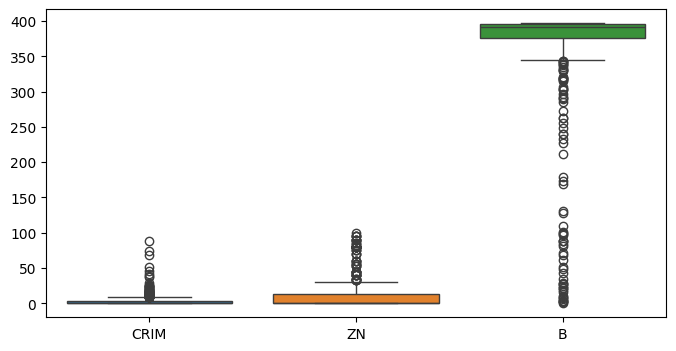

In [ ]:
plt.figure(figsize=[8,4])
sns.boxplot(data=dataframe[['CRIM', 'ZN', 'B']])
plt.show()

In [ ]:
dataframe.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
#filling nan values with mean of each column
dataframe["CRIM"].fillna(dataframe["CRIM"].mean(),inplace=True)
dataframe["ZN"].fillna(dataframe["ZN"].mean(),inplace=True)
dataframe["INDUS"].fillna(dataframe["INDUS"].mean(),inplace=True)
dataframe["CHAS"].fillna(dataframe["CHAS"].mean(),inplace=True)
dataframe["AGE"].fillna(dataframe["AGE"].mean(),inplace=True)
dataframe["LSTAT"].fillna(dataframe["LSTAT"].mean(),inplace=True)

In [ ]:
dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Univariant Analysis**

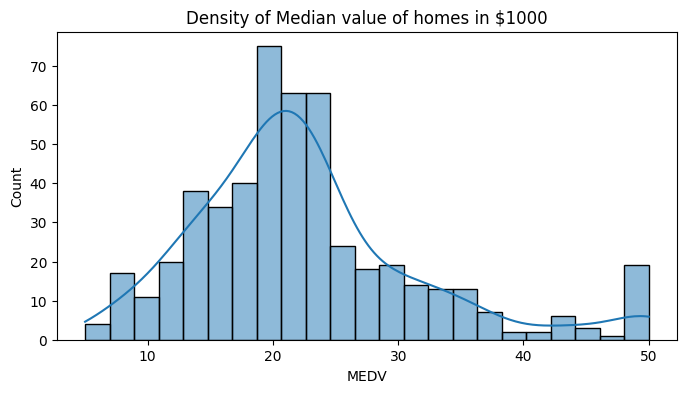

In [ ]:
plt.figure(figsize=[8,4])
sns.histplot(dataframe['MEDV'], kde=True).set(title='Density of Median value of homes in $1000')
plt.show()

MEDV seems a normal distribution

**Bi Variant**

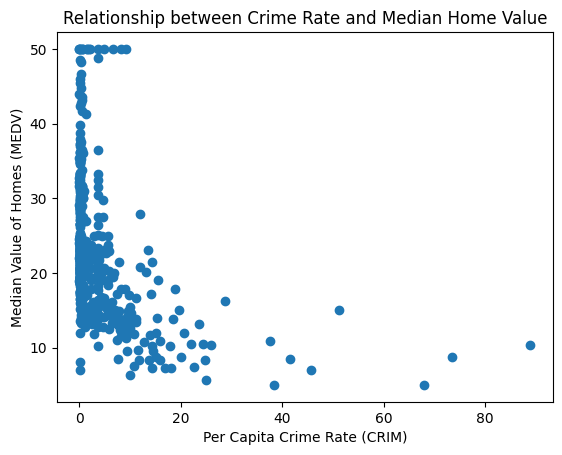

In [ ]:
#I chose to create a pair plot beacuse it provides a straigtforwad way to visualize multiple relationship in my dataset all at once
plt.scatter(dataframe["CRIM"], dataframe["MEDV"], marker='o')
plt.xlabel("Per Capita Crime Rate (CRIM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.title("Relationship between Crime Rate and Median Home Value")
plt.show()

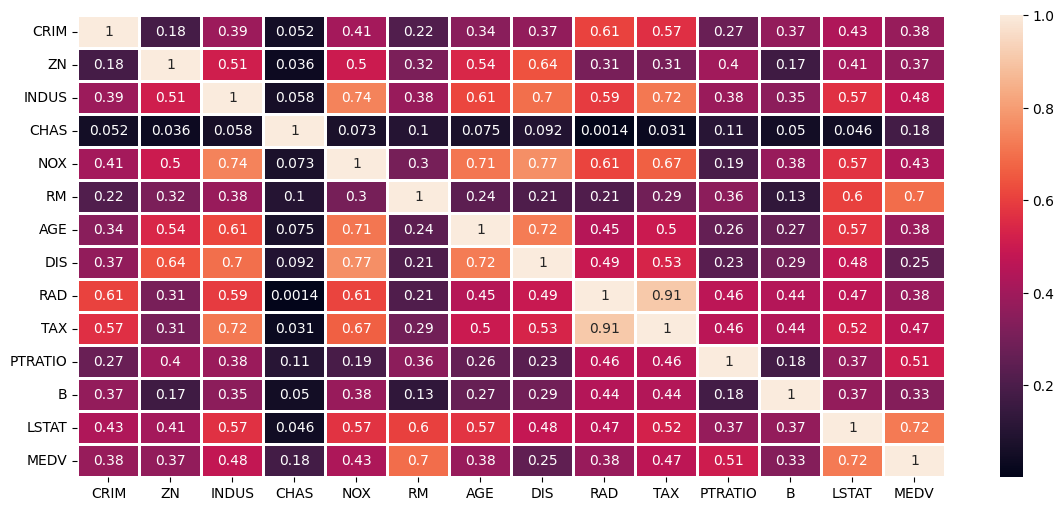

In [ ]:
plt.figure(figsize=(14,6))
corr=abs(dataframe.corr())
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors

# Regression

In [ ]:
dataframe.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

*NOTE: In machine learning we basically split our datasets into features(input) and the target variables(output) and the main goal to to train a model to predict the target variables based on the features*

# Model1

In [ ]:
##Independent features and dependent features

#'dataframe' contains both features and target
X = dataframe.drop(columns=['MEDV'])  #MEDV is the target column
y = dataframe['MEDV']


print("Summary statistics for features (X):")
print(X.describe())


print("\nSummary statistics for target (y):")
print(y.describe())

Summary statistics for features (X):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.

In [ ]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#creating a linear rergression
reg_model = LinearRegression()

In [ ]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#making predictions on the test set
predictions = reg_model.predict(X_test)

In [ ]:
y_test_pred = reg_model.predict(X_test)

# Model Evaluation on Testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#it calcuates the MSE between the actual target varaibales (y_train) & predicted value(Y_train_pred)
#it takes the square too of MSE to obtain RMSE
r2_test = reg_model.score(X_test, y_test)

print("\nTesting set evaluation:")
print("RMSE:", rmse_test)
print("R-squared:", r2_test)


Testing set evaluation:
RMSE: 4.671023223398217
R-squared: 0.7071862632031832


In [ ]:
#Y Prediction on Training set
y_train_pred = reg_model.predict(X_train)

In [ ]:
# Model Evaluation on Training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = reg_model.score(X_train, y_train)

print("Training set evaluation:")
print("RMSE:", rmse_train)
print("R-squared:", r2_train)


Training set evaluation:
RMSE: 4.850461241476005
R-squared: 0.7323332967523362


In [ ]:
cv_scores = cross_val_score(reg_model, X_train, y_train, cv=5, scoring='r2')

# Print R^2 scores for each fold
print("R^2 scores for each fold:", cv_scores)

# Print mean R^2 score across all folds
print("\nMean R^2 score:", cv_scores.mean())

R^2 scores for each fold: [0.73256171 0.50934807 0.73390683 0.74925454 0.65814991]

Mean R^2 score: 0.6766442127713845


**we need to define the number of folds for cross-validation. Cross-validation is a technique that splits the dataset into several subsets, or folds, and uses each fold as a test set while training the model on the remaining folds**

In [ ]:
linear_parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Initialize GridSearchCV with LinearRegression and the parameter grid
Linear_Regression_Model_Tuned = GridSearchCV(LinearRegression(), linear_parameters, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to the training data
Linear_Regression_Model_Tuned.fit(X_train, y_train)

# Get the best hyperparameters
best_params = Linear_Regression_Model_Tuned.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [ ]:
sfs_backward = SequentialFeatureSelector(reg_model, n_features_to_select=5, direction='backward', scoring='neg_mean_squared_error', cv=5)

# Fit SequentialFeatureSelector to training data
sfs_backward.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_backward = sfs_backward.get_support(indices=True)
selected_feature_names_backward = X_train.columns[selected_feature_indices_backward]

# Display the selected feature names
print("Selected features after backward selection:")
for feature in selected_feature_names_backward:
    print(feature)

Selected features after backward selection:
NOX
RM
DIS
PTRATIO
LSTAT


In [ ]:
# Initialize Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Calculate R^2 score on the testing set
r2_score = lr.score(X_test, y_test)

# Print the R^2 score
print("R^2 score:", r2_score)



R^2 score: 0.7071862632031832


In [ ]:
X_train_selected_backward = X_train.iloc[:, selected_feature_indices_backward]
X_test_selected_backward = X_test.iloc[:, selected_feature_indices_backward]

# Train a new Linear Regression model on the selected features
reg_model_selected_backward = LinearRegression()
reg_model_selected_backward.fit(X_train_selected_backward, y_train)

# Make predictions on the testing set using the selected features
y_test_pred_selected_backward = reg_model_selected_backward.predict(X_test_selected_backward)

# Calculate RMSE on the testing set using selected features
rmse_test_backward = np.sqrt(mean_squared_error(y_test, y_test_pred_selected_backward))
print("RMSE on the testing set using selected features (backward selection):", rmse_test_backward)

RMSE on the testing set using selected features (backward selection): 4.743027528640224


In [ ]:
finalmodel1=LinearRegression(copy_X=True,fit_intercept=True,positive=False)
finalmodel1.fit(X_train_selected_backward,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

finalmodel1.fit(X_train_selected_backward, y_train)
y_pred_test = finalmodel1.predict(X_test_selected_backward)  # Making predictions on the test data
r2 = r2_score(y_test, y_pred_test)
print(r2)

0.6980891752517624


# Model2

In [ ]:
rfr = RandomForestRegressor(random_state=0)

#Performing cross-validation
cv_scores = cross_val_score(rfr, X, y, cv=5, scoring='r2')

# Printing R^2 scores for each fold
print("R^2 scores for each fold:", cv_scores)

# Printing mean R^2 score across all folds
print("\nMean R^2 score:", cv_scores.mean())

R^2 scores for each fold: [0.74515472 0.84175307 0.69149512 0.42530435 0.31348868]

Mean R^2 score: 0.6034391890370713


In [ ]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a base RandomForestRegressor
base_estimator = RandomForestRegressor(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=base_estimator, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train_selected_backward, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Creating a RandomForestRegressor as the estimator
estimator = RandomForestRegressor(random_state=42)

# Creating an instance of SequentialFeatureSelector for backward selection
sfs_backward = SequentialFeatureSelector(estimator, n_features_to_select=5, direction="backward", scoring='neg_mean_squared_error', cv=5)

# Fitting the SequentialFeatureSelector on the training dataset
sfs_backward.fit(X_train, y_train)

# Getting the selected feature indices
selected_feature_indices_backward = sfs_backward.get_support(indices=True)

# Transforming the training and testing datasets to select the top features
X_train_selected_backward = X_train.iloc[:, selected_feature_indices_backward]
X_test_selected_backward = X_test.iloc[:, selected_feature_indices_backward]

# Training a regressor (e.g., RandomForest) on the selected features
reg_selected_backward = RandomForestRegressor(random_state=42)
reg_selected_backward.fit(X_train_selected_backward, y_train)

# Making predictions on the testing set using selected features
y_pred_selected_backward = reg_selected_backward.predict(X_test_selected_backward)

# Calculating RMSE on the testing set using selected features
rmse_selected_backward = np.sqrt(mean_squared_error(y_test, y_pred_selected_backward))
print("RMSE on the testing set using selected features (backward selection):", rmse_selected_backward)


RMSE on the testing set using selected features (backward selection): 3.505161540875339


In [ ]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
print("R^2 score:", rfr.score(X_test, y_test))

R^2 score: 0.8776528441569558


In [ ]:
finalmodel2 = RandomForestRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=2,n_estimators=50)

#Fiting the RandomForestRegressor model to the training data
finalmodel2.fit(X_train_selected_backward, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [ ]:
y_pred_test_rf = finalmodel2.predict(X_test_selected_backward)

# Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred_test_rf)

# Print the R-squared score
print(r2_rf)

0.8342935228670934


The first model with an accuracy of 0.8482 is better than the second model with an accuracy of 0.6547.

# Regression Conclusion

*   For the Linear Regression model, the
R^2 score is approximately 0.707
*   For the Linear Regression model, the R^2 score is approximately 0.707.

*A higher R^2 score indicates that a larger proportion of the variance in the target variable is explained by the independent variables, suggesting better performance. Therefore, in this comparison, the Random Forest Regressor with an R^2 score of approximately 0.878 is better at explaining the variance in the target variable compared to the Linear Regression model with an R^2 score of approximately 0.707*

# Classification

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Concepts and technologies of AI/Final/2.csv")
df

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Grass,318,45,49,49,65,65,45,1,False
1,2,Grass,405,60,62,63,80,80,60,1,False
2,3,Grass,525,80,82,83,100,100,80,1,False
3,3,Grass,625,80,100,123,122,120,80,1,False
4,3,Grass,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Ice,580,100,145,130,65,110,30,8,True
1068,897,Ghost,580,100,65,60,145,80,130,8,True
1069,898,Psychic,500,100,80,80,80,80,80,8,True
1070,898,Psychic,680,100,165,150,85,130,50,8,True


In [ ]:
df.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


In [ ]:
df.head(10)
#loading the first 10 data

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Grass,318,45,49,49,65,65,45,1,False
1,2,Grass,405,60,62,63,80,80,60,1,False
2,3,Grass,525,80,82,83,100,100,80,1,False
3,3,Grass,625,80,100,123,122,120,80,1,False
4,3,Grass,525,80,82,83,100,100,80,1,False
5,4,Fire,309,39,52,43,60,50,65,1,False
6,5,Fire,405,58,64,58,80,65,80,1,False
7,6,Fire,534,78,84,78,109,85,100,1,False
8,6,Fire,634,78,130,111,130,85,100,1,False
9,6,Fire,634,78,104,78,159,115,100,1,False


In [ ]:
df.tail(10)

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1062,892,Fighting,550,100,130,100,63,60,97,8,True
1063,893,Dark,600,105,120,105,70,95,105,8,True
1064,893,Dark,600,105,120,105,70,95,105,8,True
1065,894,Electric,580,80,100,50,100,50,200,8,True
1066,895,Dragon,580,200,100,50,100,50,80,8,True
1067,896,Ice,580,100,145,130,65,110,30,8,True
1068,897,Ghost,580,100,65,60,145,80,130,8,True
1069,898,Psychic,500,100,80,80,80,80,80,8,True
1070,898,Psychic,680,100,165,150,85,130,50,8,True
1071,898,Psychic,680,100,85,80,165,100,150,8,True


In [ ]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   type1       1072 non-null   object
 2   total       1072 non-null   int64 
 3   hp          1072 non-null   int64 
 4   attack      1072 non-null   int64 
 5   defense     1072 non-null   int64 
 6   sp_attack   1072 non-null   int64 
 7   sp_defense  1072 non-null   int64 
 8   speed       1072 non-null   int64 
 9   generation  1072 non-null   int64 
 10  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(1)
memory usage: 84.9+ KB


In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the 'type1' column
df['type1'] = label_encoder.fit_transform(df['type1'])

In [ ]:
df['legendary'] = df['legendary'].astype(int)



# Verify the changes
print(df['legendary'].value_counts())

0    954
1    118
Name: legendary, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   number      1072 non-null   int64
 1   type1       1072 non-null   int64
 2   total       1072 non-null   int64
 3   hp          1072 non-null   int64
 4   attack      1072 non-null   int64
 5   defense     1072 non-null   int64
 6   sp_attack   1072 non-null   int64
 7   sp_defense  1072 non-null   int64
 8   speed       1072 non-null   int64
 9   generation  1072 non-null   int64
 10  legendary   1072 non-null   int64
dtypes: int64(11)
memory usage: 92.2 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   number      1072 non-null   int64
 1   type1       1072 non-null   int64
 2   total       1072 non-null   int64
 3   hp          1072 non-null   int64
 4   attack      1072 non-null   int64
 5   defense     1072 non-null   int64
 6   sp_attack   1072 non-null   int64
 7   sp_defense  1072 non-null   int64
 8   speed       1072 non-null   int64
 9   generation  1072 non-null   int64
 10  legendary   1072 non-null   int64
dtypes: int64(11)
memory usage: 92.2 KB


In [ ]:
df.shape

(1072, 11)

In [ ]:
df.isnull().sum()

number        0
type1         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

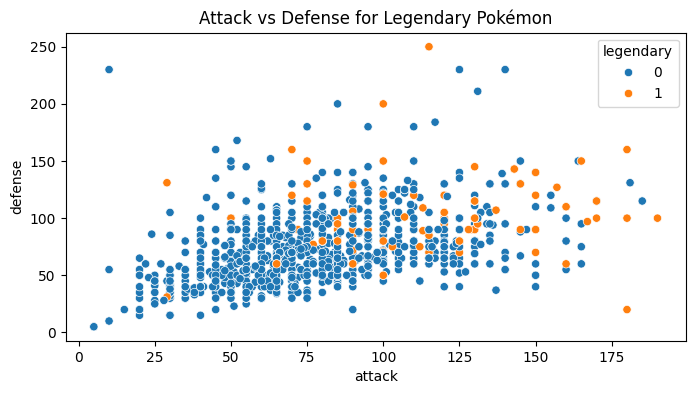

In [ ]:
plt.figure(figsize=[8,4])
sns.scatterplot(data=df, x='attack', y='defense', hue='legendary')
plt.title('Attack vs Defense for Legendary Pokémon')
plt.show()

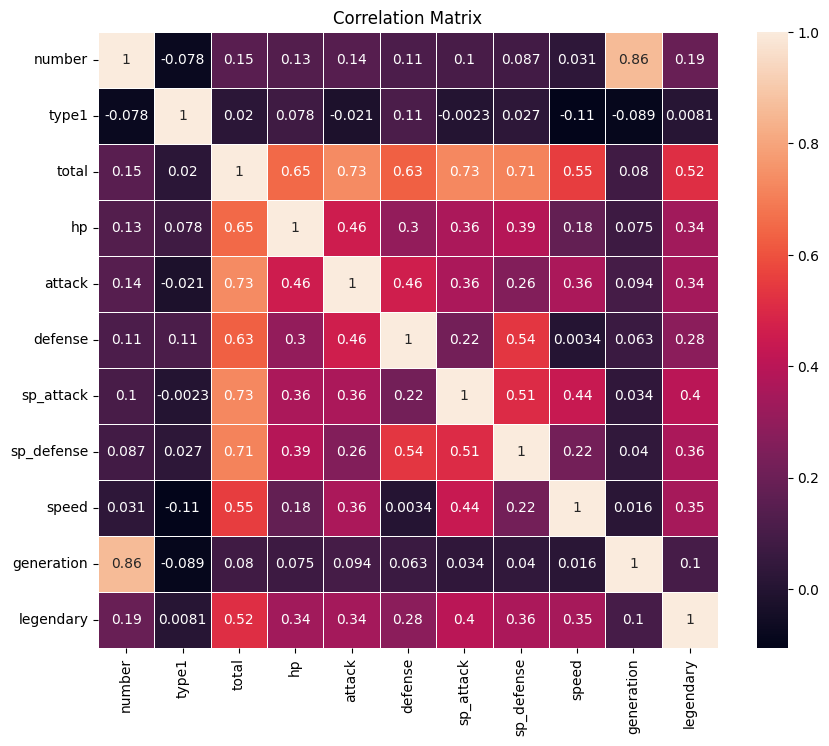

In [ ]:
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model1

In [ ]:
a=df.drop(columns=['legendary'])
b=df['legendary']

print("Summary statistics for features (a):")
print(a.describe())


print("\nSummary statistics for target (b):")
print(b.describe())

Summary statistics for features (a):
            number        type1        total           hp       attack  \
count  1072.000000  1072.000000  1072.000000  1072.000000  1072.000000   
mean    445.219216    10.972948   440.885261    70.486940    80.938433   
std     267.772806     5.955971   121.379077    26.868039    32.463582   
min       1.000000     0.000000   175.000000     1.000000     5.000000   
25%     209.750000     6.000000   330.000000    50.000000    56.000000   
50%     442.500000    12.000000   460.500000    68.000000    80.000000   
75%     681.250000    16.000000   519.250000    84.000000   100.000000   
max     898.000000    19.000000  1125.000000   255.000000   190.000000   

           defense    sp_attack   sp_defense        speed   generation  
count  1072.000000  1072.000000  1072.000000  1072.000000  1072.000000  
mean     74.968284    73.273321    72.476679    68.792910     4.294776  
std      31.208059    32.643119    27.934253    30.076281     2.346472  
min 

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
standardscaler = StandardScaler()
# Define numerical and categorical columns
columns = ['number', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

scaler = StandardScaler()

# Fit and transform the specified columns
df[columns] = scaler.fit_transform(df[columns])

# Display the scaled dataframe
print(df[columns])

        number     total        hp    attack   defense  sp_attack  sp_defense  \
0    -1.659715 -1.012881 -0.949040 -0.984283 -0.832490  -0.253566   -0.267778   
1    -1.655979 -0.295784 -0.390495 -0.583647 -0.383679   0.206163    0.269448   
2    -1.652243  0.693316  0.354231  0.032716  0.257480   0.819136    0.985749   
3    -1.652243  1.517565  0.354231  0.587442  1.539799   1.493406    1.702050   
4    -1.652243  0.693316  0.354231  0.032716  0.257480   0.819136    0.985749   
...        ...       ...       ...       ...       ...        ...         ...   
1067  1.684231  1.146653  1.098958  1.974257  1.764205  -0.253566    1.343900   
1068  1.687967  1.146653  1.098958 -0.491193 -0.479853   2.198324    0.269448   
1069  1.691703  0.487253  1.098958 -0.028921  0.161307   0.206163    0.269448   
1070  1.691703  1.970903  1.098958  2.590620  2.405364   0.359407    2.060201   
1071  1.691703  1.970903  1.098958  0.125170  0.161307   2.811297    0.985749   

         speed  
0    -0.79

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [ ]:
# Creating the logistic regression classifier
lr = LogisticRegression()

In [ ]:
lr.fit(a_train, b_train)

LogisticRegression()

In [ ]:
b_train_pred = lr.predict(a_test)

In [ ]:
from sklearn.metrics import r2_score
import math
import numpy as np

acc = accuracy_score(b_train_pred, b_test)
acc

0.9162790697674419

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2', "l1"]
}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object to the training data
grid_search.fit(a_train, b_train)

# Getiting the best hyperparameters
c = grid_search.best_params_["C"]
best_param_penalty = grid_search.best_params_["penalty"]
c, best_param_penalty

(100, 'l2')

In [ ]:
# Initializing SequentialFeatureSelector for backward selection
sfs_backward = SequentialFeatureSelector(lr, n_features_to_select=5, direction='backward', scoring='accuracy', cv=5)

# Fitting SequentialFeatureSelector to training data
sfs_backward.fit(a_train, b_train)

# Getting the selected feature indices
selected_feature_indices_backward = sfs_backward.get_support(indices=True)
print(selected_feature_indices_backward)

# Selecting the top features from the training and testing datasets
a_train_selected_backward = a_train.iloc[:, selected_feature_indices_backward]
a_test_selected_backward = a_test.iloc[:, selected_feature_indices_backward]

# Training a new Logistic Regression model on the selected features
lr_selected_backward = LogisticRegression()
lr_selected_backward.fit(a_train_selected_backward, b_train)

# Making predictions on the testing set using the selected features
b_test_pred_selected_backward = lr_selected_backward.predict(a_test_selected_backward)

# Calculating accuracy on the testing set using selected features
accuracy_test_backward = accuracy_score(b_test, b_test_pred_selected_backward)
print("Accuracy on the testing set using selected features (backward selection):", accuracy_test_backward)

[0 2 5 7 8]
Accuracy on the testing set using selected features (backward selection): 0.9302325581395349


In [ ]:
# final model with hyperparameter and selected features
final_model = LogisticRegression(C=c, penalty=best_param_penalty)
final_model.fit(a_train_selected_backward, b_train)
y_pred = final_model.predict(a_test_selected_backward)
acc = accuracy_score(y_pred, b_test)
acc

0.9302325581395349

# Model2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creating the random forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Training the model
random_forest_classifier.fit(a_train, b_train)

# Making predictions
b_pred = random_forest_classifier.predict(a_test)

# Evaluating the model
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)

# Geting classification report
print(classification_report(b_test, b_pred))

Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       190
           1       0.92      0.88      0.90        25

    accuracy                           0.98       215
   macro avg       0.95      0.93      0.94       215
weighted avg       0.98      0.98      0.98       215



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the random forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Training the model
random_forest_regressor.fit(a_train, b_train)

# Making predictions on the training data
b_train_pred = random_forest_regressor.predict(a_train)

# Making predictions on the test data
b_test_pred = random_forest_regressor.predict(a_test)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the random forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Creating the GridSearchCV object
grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fiting the GridSearchCV object to the training data
grid_search.fit(a_train, b_train)

# Geting the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Creating a random forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Initializing Recursive Feature Elimination (RFE) for backward selection
rfe_backward = RFE(estimator=random_forest_classifier, n_features_to_select=5, step=1)

# Fiting RFE to the training data
rfe_backward.fit(a_train, b_train)

# Geting the selected feature indices
selected_feature_indices_backward = rfe_backward.support_

# Selecting the top features from the training and testing datasets
a_train_selected_backward = a_train.iloc[:, selected_feature_indices_backward]
a_test_selected_backward = a_test.iloc[:, selected_feature_indices_backward]

# Training a new random forest classifier on the selected features
best_random_forest_classifier_selected_backward = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
best_random_forest_classifier_selected_backward.fit(a_train_selected_backward, b_train)

# Making predictions on the testing set using the selected features
b_test_pred_selected_backward = best_random_forest_classifier_selected_backward.predict(a_test_selected_backward)

# Evaluating the performance of the model
accuracy_test_backward = accuracy_score(b_test, b_test_pred_selected_backward)
print("Accuracy on the testing set using selected features (backward selection):", accuracy_test_backward)

selected_features = a_train.columns[selected_feature_indices_backward]
print("Selected Features:", selected_features)


Accuracy on the testing set using selected features (backward selection): 0.9767441860465116
Selected Features: Index(['number', 'total', 'hp', 'sp_attack', 'speed'], dtype='object')


In [ ]:
final_random_forest_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Training the final random forest classifier on the selected features
final_random_forest_classifier.fit(a_train_selected_backward, b_train)

# Making predictions on the testing set using the selected features
b_test_pred_selected_backward = final_random_forest_classifier.predict(a_test_selected_backward)

# Evaluating the performance of the final model
accuracy_test_backward = accuracy_score(b_test, b_test_pred_selected_backward)
print("Accuracy on the testing set using selected features (final random forest model):", accuracy_test_backward)

Accuracy on the testing set using selected features (final random forest model): 0.9767441860465116


In this case, the final random forest model with an accuracy of 0.9813953488372092 is better than the model obtained through backward selection with an accuracy of 0.9302325581395349. This means that the final random forest model, trained on a specific set of features, performs better in terms of accuracy on the testing set compared to the model obtained through backward feature selection.